<a href="https://colab.research.google.com/github/imaniketmondal/Carbon-Emissions-Prediction---AICTE-Internship/blob/main/week2_project/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = pd.read_csv(r'data_cleaned.csv')

In [4]:
print('shape of the dataset')
data.shape

shape of the dataset


(1700, 18)

In [5]:
print('available columns and their data types')
data.dtypes

available columns and their data types


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [6]:
print('Overview of the first 5 rows:')
data.head()

Overview of the first 5 rows:


country  year  cereal_yield  ...         pop  urb_pop_growth_perc       urb_pop
0     AGO  1991         417.4  ...  10653515.0             6.687032  4.099473e+06
1     ARE  1991        1594.0  ...   1909812.0             5.265704  1.507988e+06
2     ARG  1991        2666.1  ...  33093579.0             1.762636  2.890393e+07
3     AUS  1991        1603.3  ...  17284000.0             1.438378  1.478473e+07
4     AUT  1991        5463.0  ...   7798899.0             1.134999  5.131676e+06

[5 rows x 18 columns]

In [7]:
print('Descriptive statistics:')
data.describe().T

Descriptive statistics:


count          mean  ...           75%           max
year                 1700.0  1.999571e+03  ...  2.004000e+03  2.008000e+03
cereal_yield         1700.0  3.013318e+03  ...  3.933400e+03  8.410800e+03
fdi_perc_gdp         1700.0  2.948940e+00  ...  3.702149e+00  5.137395e+01
en_per_gdp           1700.0  2.498227e+02  ...  2.864749e+02  1.383380e+03
en_per_cap           1700.0  1.968980e+03  ...  2.893996e+03  1.260784e+04
co2_ttl              1700.0  9.793999e+05  ...  3.708446e+05  3.064936e+07
co2_per_cap          1700.0  4.676663e+00  ...  7.441195e+00  3.710650e+01
co2_per_gdp          1700.0  4.823038e+02  ...  5.869730e+02  3.343454e+03
pop_urb_aggl_perc    1700.0  2.148013e+01  ...  2.898832e+01  6.050578e+01
prot_area_perc       1700.0  1.220179e+01  ...  1.659930e+01  5.374983e+01
gdp                  1700.0  1.058568e+12  ...  4.122600e+11  5.580488e+13
gni_per_cap          1700.0  7.898669e+03  ...  9.205000e+03  5.862000e+04
under_5_mort_rate    1700.0  5.197196e+01  ...  7.992574e+01  2.391000e+02
pop_growth_perc      1700.0  1.451313e+00  ...  2.276853e+00  1.118066e+01
pop                  1700.0  3.060142e+08  ...  8.234386e+07  6.610030e+09
urb_pop_growth_perc  1700.0  2.252231e+00  ...  3.364747e+00  1.282905e+01
urb_pop              1700.0  1.347903e+08  ...  4.835246e+07  3.264974e+09

[17 rows x 8 columns]

# Global Average CO₂ Emissions per Capita Over Time – Chart Explanation
*This line chart shows the global average CO₂ emissions per capita (in metric tons) from 1991 to 2008.*

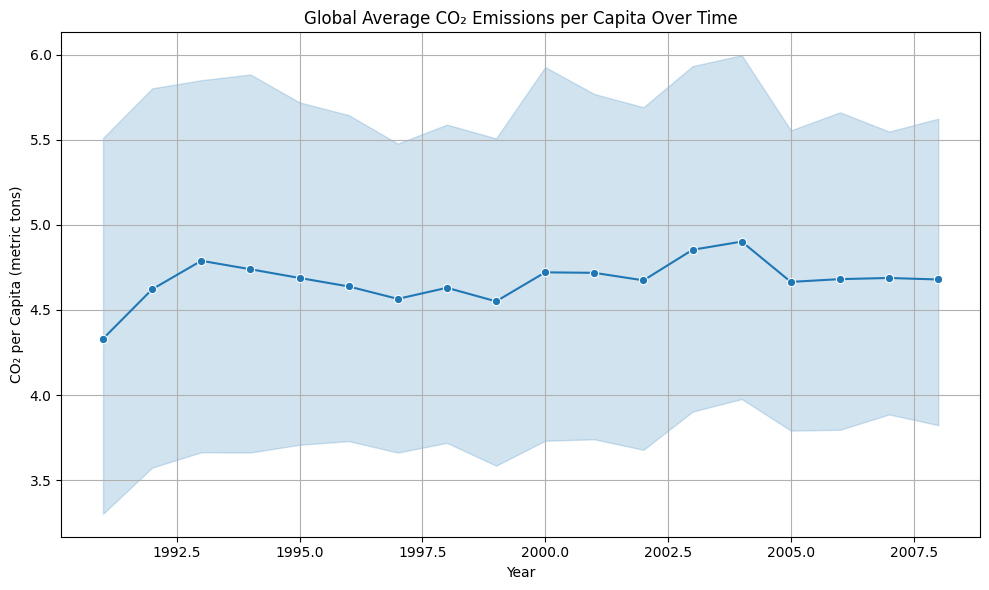

In [8]:
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total CO₂ Emissions vs Population – Chart
*This scatter plot illustrates the relationship between a country's total CO₂ emissions and its population.*

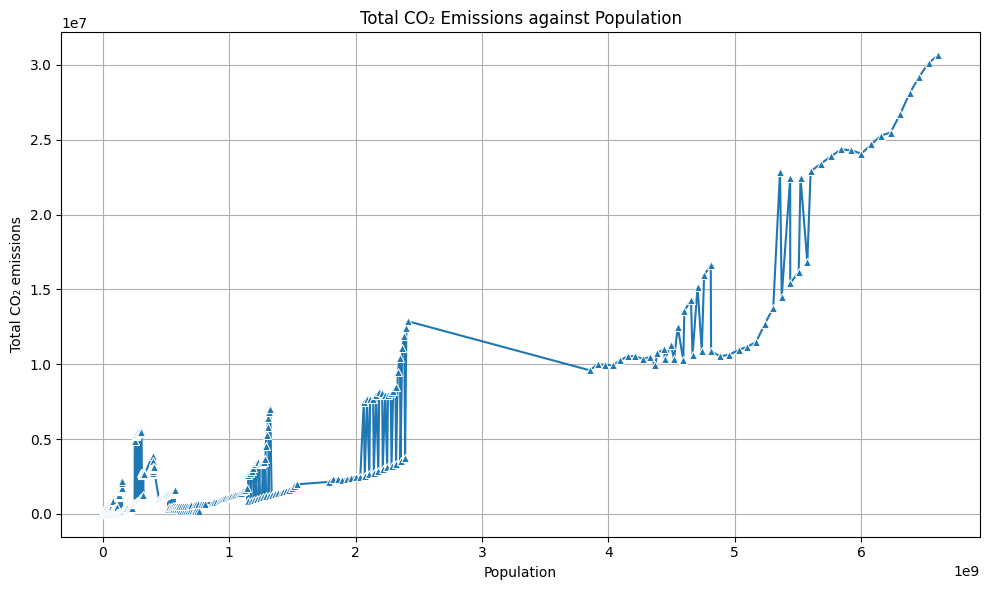

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature engineering

In [10]:
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

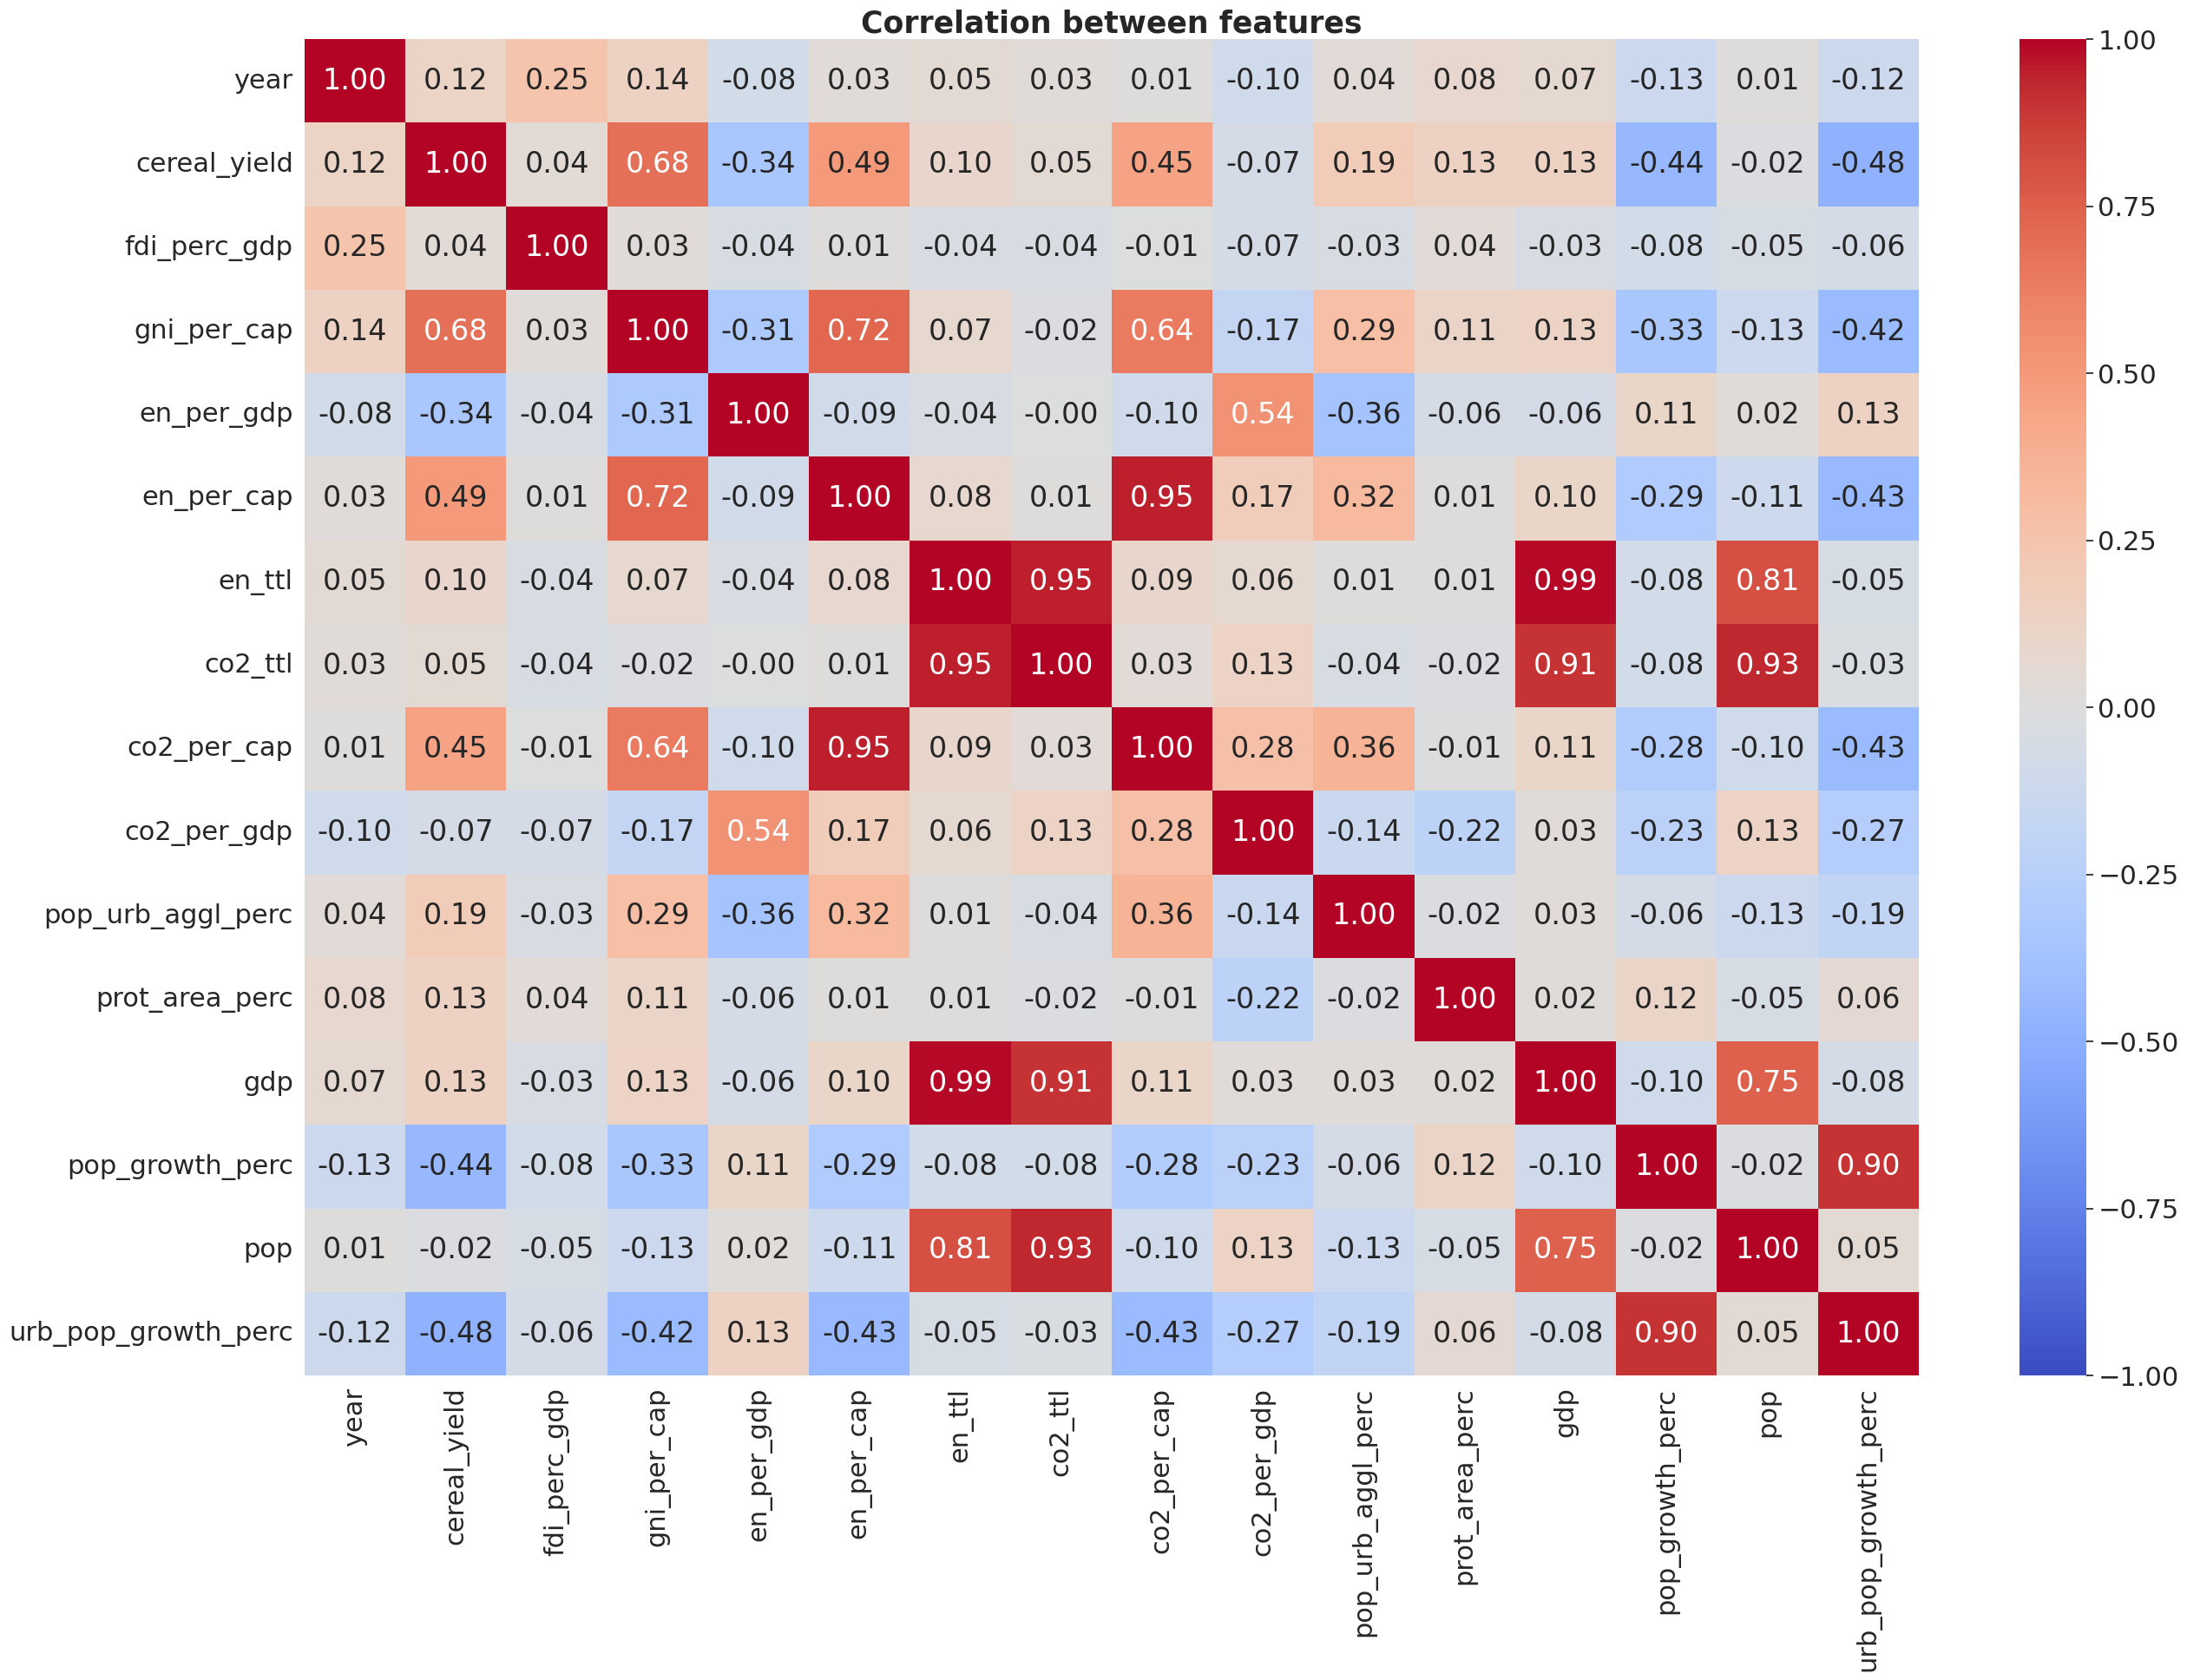

In [11]:
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f",
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)

In [12]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])]
print(vif_data)

               feature        VIF
0         cereal_yield   1.528133
1         fdi_perc_gdp   0.971334
2          gni_per_cap   2.910812
3           en_per_cap  12.579371
4          co2_per_cap  10.762323
5    pop_urb_aggl_perc   0.979676
6       prot_area_perc   1.022400
7                  gdp   1.106440
8      pop_growth_perc   6.336530
9  urb_pop_growth_perc   5.808288


In [13]:
features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

# Prepare the visualizations

In [14]:
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

In [15]:
unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'AUS', 'AUT', 'BGD', 'BGR', 'BOL', 'BRA',
       'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'CRI',
       'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'EMU', 'ESP', 'FIN',
       'FRA', 'GBR', 'GHA', 'GRC', 'GTM', 'HND', 'HUN', 'IDN', 'IND',
       'IRL', 'ISR', 'ITA', 'JOR', 'JPN', 'KEN', 'KOR', 'LAC', 'LIC',
       'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA',
       'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY', 'ROM',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR', 'TGO',
       'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM', 'WLD',
       'ZAF', 'ZAR', 'ZMB', 'ARM', 'BLR', 'ECA', 'POL', 'RUS', 'UKR',
       'UZB', 'YEM', 'CZE', 'ETH', 'KAZ', 'IRN'], dtype=object)

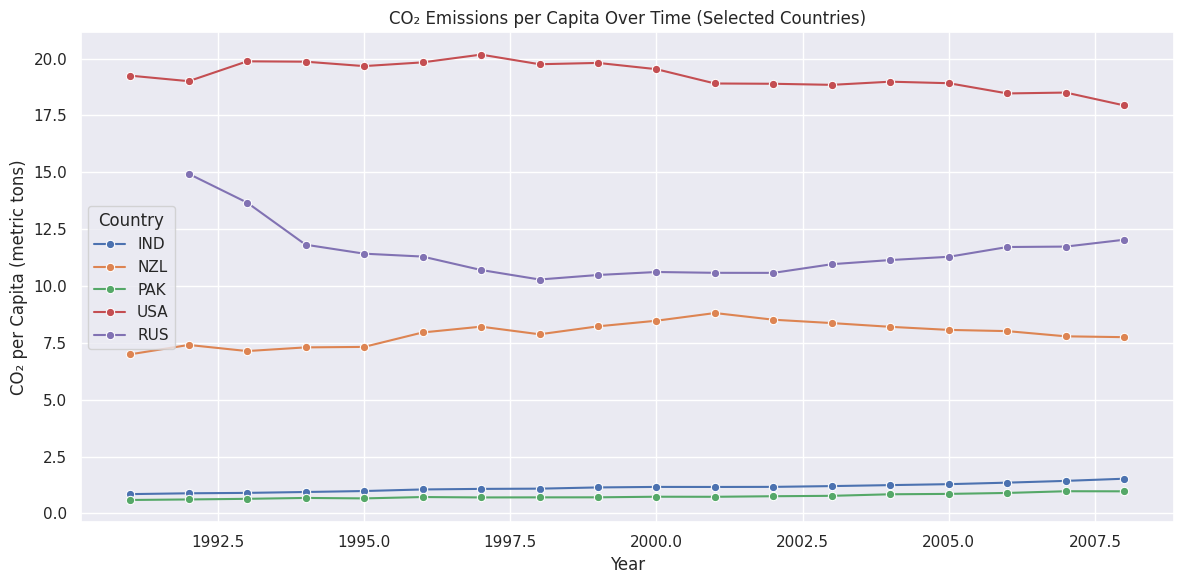

In [16]:
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']
df_selected = data[data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

# Create plots and visualizations

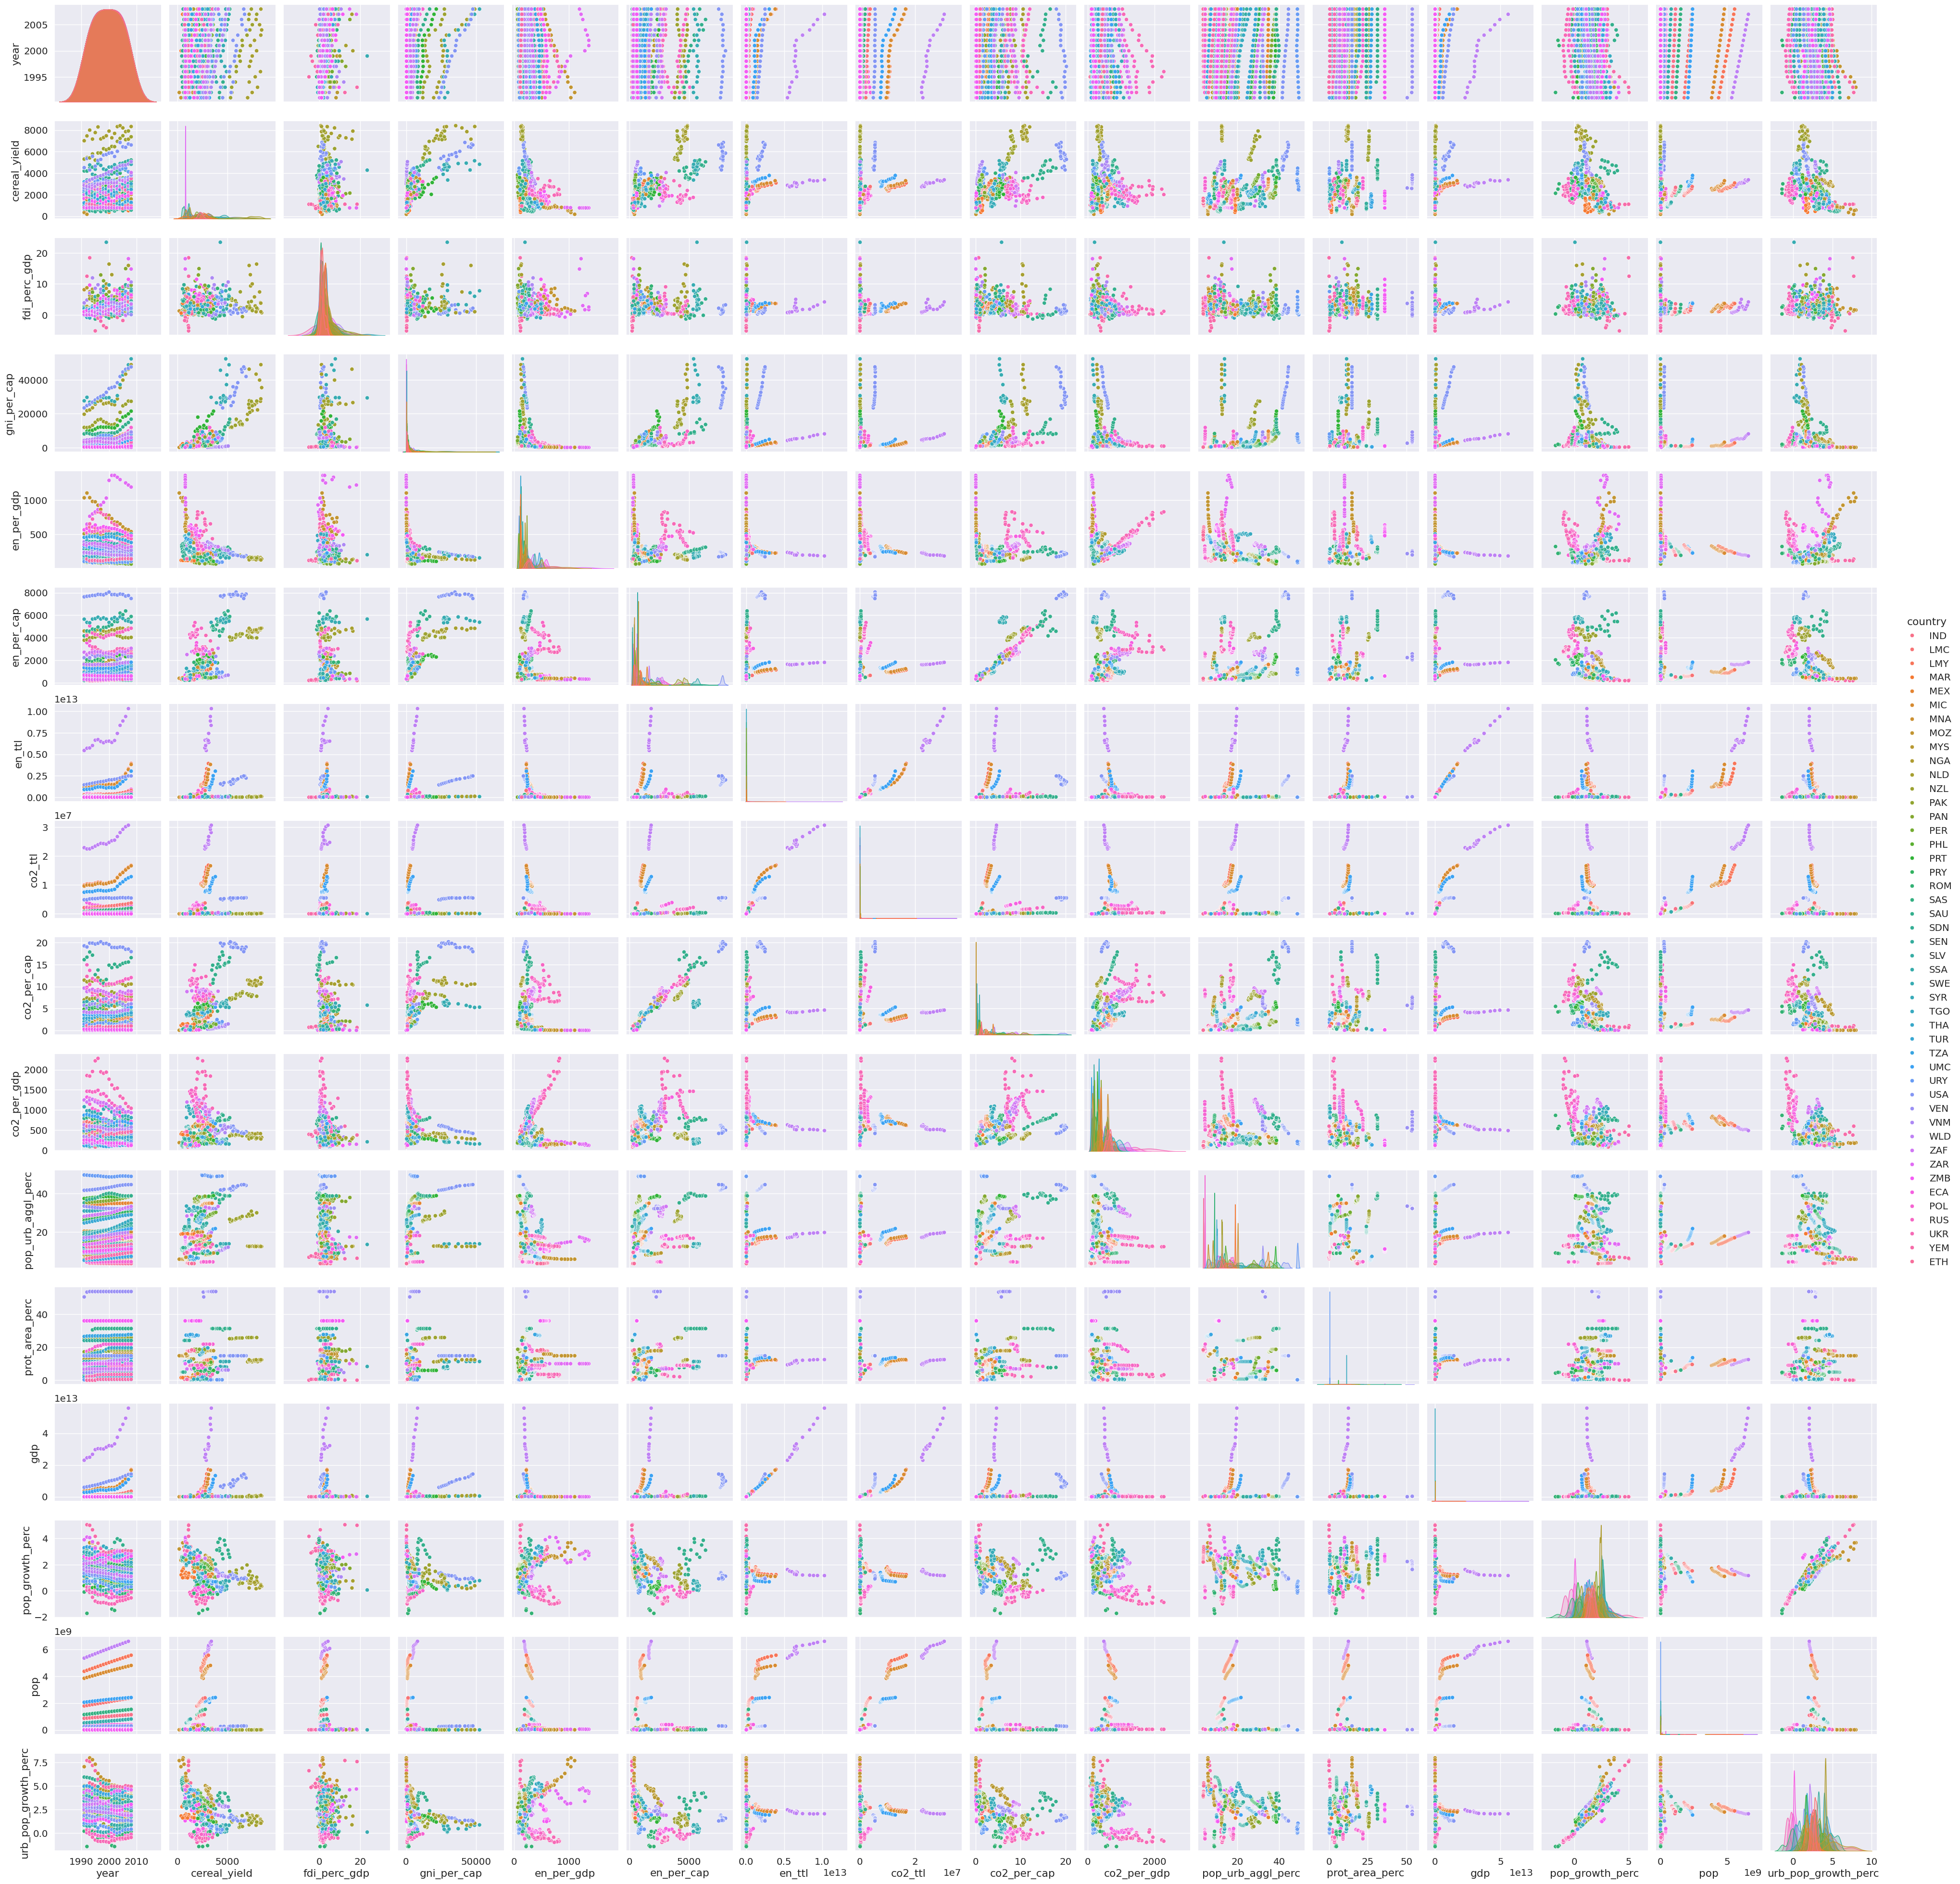

In [18]:
sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

 (United Arab Emirates)ARE data points were removed, and the updated plots are presented below:

In [19]:
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

# Keep as DataFrame for filtering
features_for_plot = data[feature_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# remove the ARE outliers from the DataFrame used for plotting
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

Text(115.34385937499995, 0.5, 'CO2 emissions per capita [t]')

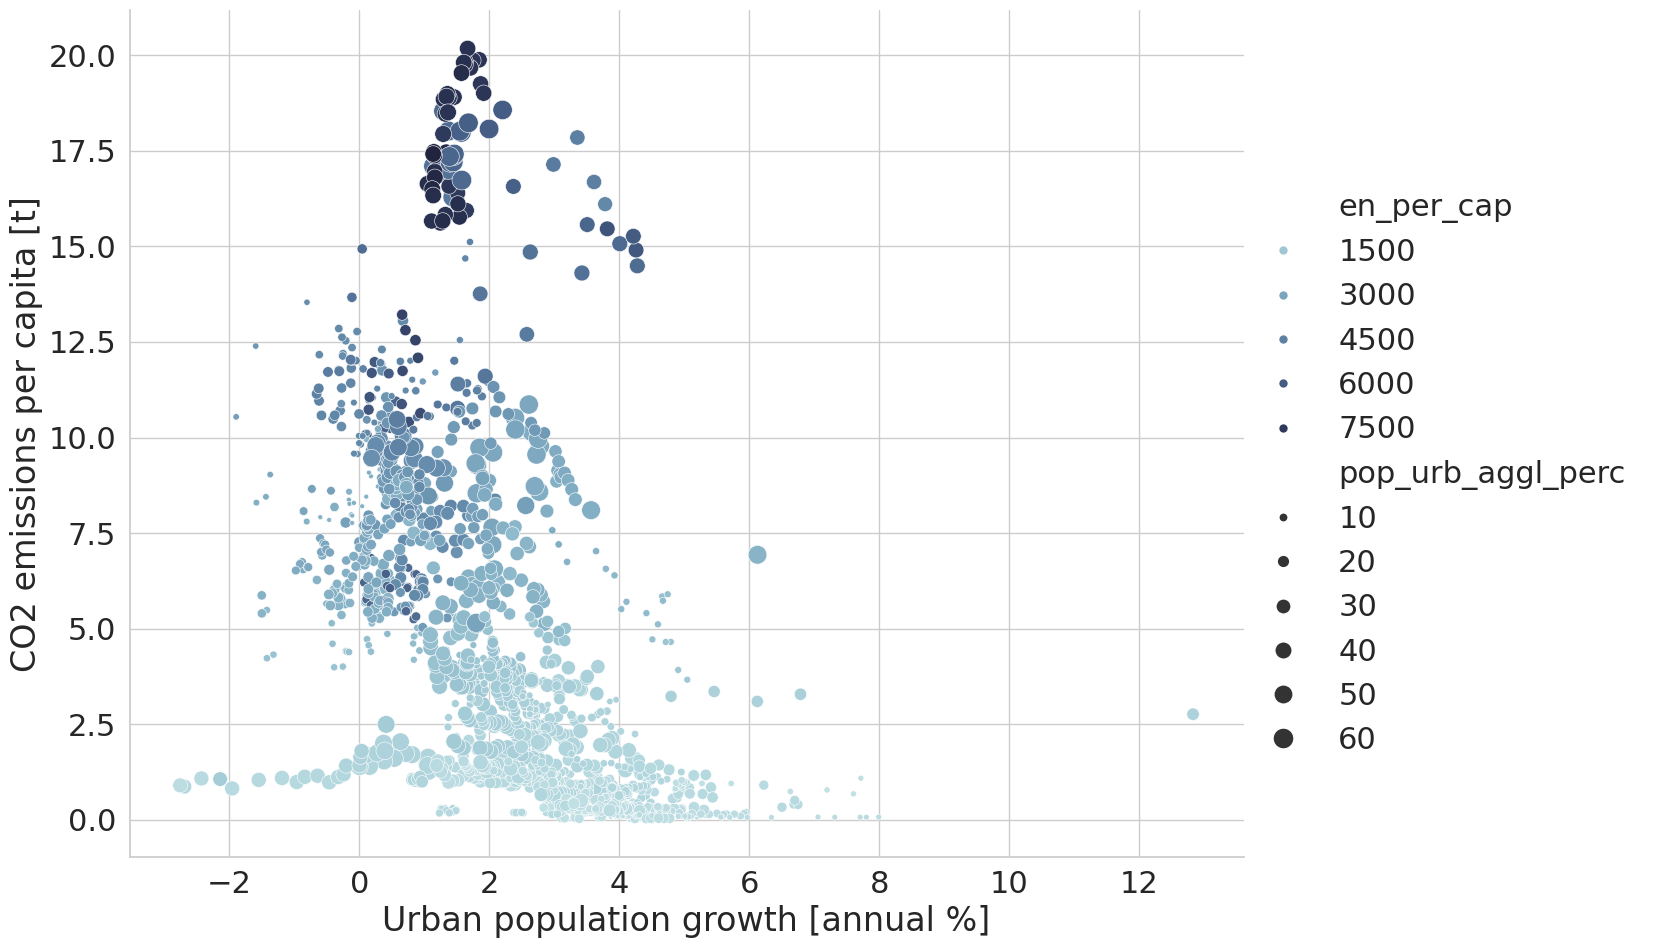

In [20]:
sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot, # Use the DataFrame specifically prepared for plotting
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])